In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
pd.set_option('display.max_rows', 500)

In [6]:
data0 = pd.read_csv('./vino_alko_2018-2020/all_data.csv', parse_dates=['Datum'])

In [61]:
cleaned_names = pd.read_csv('./vino_alko_2018-2020/merged_names.csv')

In [7]:
data0

Datum  Poslovnica                                Adresa  \
0       2018-12-17       10100          Put Brodarice 6, 21000 Split   
1       2018-12-21       10100          Put Brodarice 6, 21000 Split   
2       2018-12-24       10100          Put Brodarice 6, 21000 Split   
3       2018-12-30       10100          Put Brodarice 6, 21000 Split   
4       2019-01-08       10100          Put Brodarice 6, 21000 Split   
...            ...         ...                                   ...   
4179445 2020-09-10       10332  Odvojak Stjepana Radića 2, 51500 Krk   
4179446 2020-10-04       10332  Odvojak Stjepana Radića 2, 51500 Krk   
4179447 2020-09-09       10332  Odvojak Stjepana Radića 2, 51500 Krk   
4179448 2020-10-20       10332  Odvojak Stjepana Radića 2, 51500 Krk   
4179449 2020-10-23       10332  Odvojak Stjepana Radića 2, 51500 Krk   

               Artikal                           Naziv  Cijena  Prodaja  \
0                 3311  VINO PLAVAC 2718 0,75 L DUBOKO   89.99        1   
1                 3311  VINO PLAVAC 2718 0,75 L DUBOKO   89.99        2   
2                 3311  VINO PLAVAC 2718 0,75 L DUBOKO   89.99        1   
3                 3311  VINO PLAVAC 2718 0,75 L DUBOKO   89.99        1   
4                 3311  VINO PLAVAC 2718 0,75 L DUBOKO   89.99        1   
...                ...                             ...     ...      ...   
4179445  8501110080927  RUM 0,70L HAVANA CLUB ESPECIAL    0.00        0   
4179446  9001700007239     RUM MAUTNER 0,7 L INLAENDER    0.00        0   
4179447  9999998001727  VINO GRAŠEVINA 0,75 L FERAVINO    0.00        0   
4179448  9999998001727  VINO GRAŠEVINA 0,75 L FERAVINO    0.00        0   
4179449  9999998001727  VINO GRAŠEVINA 0,75 L FERAVINO    0.00        0   

         Naruceno  Povrat  
0               0       0  
1               0       0  
2               0       0  
3               0       0  
4               0       0  
...           ...     ...  
4179445         6       0  
4179446         6       0  
4179447        12       0  
4179448        12       0  
4179449        12       0  

[4179450 rows x 9 columns]

In [11]:
data0.dtypes

Datum         datetime64[ns]
Poslovnica             int64
Adresa                object
Artikal                int64
Naziv                 object
Cijena               float64
Prodaja                int64
Naruceno               int64
Povrat                 int64
dtype: object

In [12]:
data0.describe()

Poslovnica       Artikal        Cijena       Prodaja      Naruceno  \
count  4.179450e+06  4.179450e+06  4.179450e+06  4.179450e+06  4.179450e+06   
mean   1.021160e+04  4.335701e+12  4.143582e+03  1.539964e+00  4.286082e+00   
std    6.915992e+01  9.826623e+11  4.248949e+06  2.055030e+00  2.714389e+03   
min    1.010000e+04  1.150000e+02  0.000000e+00 -1.000000e+02  0.000000e+00   
25%    1.015300e+04  3.850158e+12  1.449000e+01  1.000000e+00  0.000000e+00   
50%    1.019700e+04  3.859888e+12  2.999000e+01  1.000000e+00  0.000000e+00   
75%    1.028000e+04  5.010677e+12  4.499000e+01  2.000000e+00  0.000000e+00   
max    1.033200e+04  9.999998e+12  5.449000e+09  5.540000e+02  3.850112e+06   

             Povrat  
count  4.179450e+06  
mean  -1.916520e-03  
std    4.809481e-01  
min   -3.330000e+02  
25%    0.000000e+00  
50%    0.000000e+00  
75%    0.000000e+00  
max    2.160000e+02

# Provjera numeričkih vrijednosti

## Outlineri

### Prodaja

In [22]:
data0['Prodaja'].min(), data0['Prodaja'].max()

(-100, 554)

In [60]:
data0['Prodaja'].value_counts().sort_index()

-100          1
-65           1
-59           1
-54           1
-44           1
-39           1
-36           1
-33           2
-32           1
-31           1
-30           1
-27           1
-25           1
-24           1
-23           2
-22           2
-21           1
-20           4
-19           1
-18           1
-17           3
-16           3
-15           4
-14           2
-13           5
-12          19
-11          13
-10          18
-9           26
-8           32
-7           58
-6          103
-5          145
-4          271
-3          541
-2         1482
-1         5441
 0       535045
 1      2399047
 2       680817
 3       250527
 4       121671
 5        63000
 6        40132
 7        22453
 8        14852
 9         9889
 10        7373
 11        5100
 12        4419
 13        2894
 14        2233
 15        1738
 16        1405
 17        1161
 18        1043
 19         787
 20         700
 21         564
 22         456
 23         402
 24         405
 25     

In [23]:
data0['Naruceno'].min(), data0['Naruceno'].max()

(0, 3850112)

In [24]:
data0['Povrat'].min(), data0['Povrat'].max()

(-333, 216)

In [25]:
data0['Cijena'].min(), data0['Cijena'].max()

(0.0, 5449000247.0)

## Datum

### Description

In [18]:
print('Datumi su od: ', data0.Datum.min(), ' do: ', data0.Datum.max())

Datumi su od:  2018-11-01 00:00:00  do:  2020-10-31 00:00:00


<AxesSubplot:xlabel='Datum'>

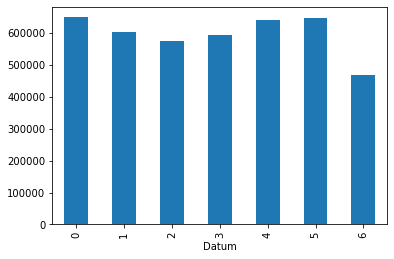

In [21]:
data0.groupby(data0.Datum.dt.weekday)['Naziv'].count().plot(kind='bar')

Najmanje se prodaje Nedjeljom.
Na Bozic i dan nakon Bozica se ne prodaje. Takoder na Novu godinu se ne prodaje. No na dane prije Bozica i Nove Godine je povecan broj zapisa, a pogotovo na Badnjak i Staru Godinu.
Radi Covida nije se radilo za nedjelje i blagdane na datume 1.5(Praznik rada), 3.5, 10.5, 17.5, 24.5, 30.5(Dan Drzavnosti) i 11.6 (Tjelovo)

### Cleaning

## Poslovnica - Adresa

### Description

In [26]:
poslovnice = data0.Poslovnica.unique()
print(len(poslovnice))
poslovnice

216


array([10100, 10101, 10104, 10105, 10106, 10107, 10108, 10109, 10110,
       10111, 10112, 10113, 10114, 10115, 10116, 10117, 10118, 10119,
       10120, 10121, 10122, 10124, 10125, 10126, 10127, 10128, 10129,
       10130, 10131, 10132, 10133, 10134, 10135, 10136, 10137, 10139,
       10140, 10142, 10143, 10144, 10145, 10146, 10147, 10148, 10149,
       10150, 10151, 10152, 10153, 10154, 10155, 10156, 10157, 10158,
       10160, 10161, 10162, 10163, 10164, 10165, 10166, 10167, 10168,
       10169, 10170, 10171, 10172, 10173, 10174, 10175, 10176, 10177,
       10178, 10179, 10180, 10181, 10182, 10183, 10184, 10186, 10187,
       10188, 10189, 10190, 10191, 10192, 10196, 10197, 10198, 10199,
       10200, 10201, 10202, 10203, 10204, 10205, 10206, 10208, 10209,
       10210, 10211, 10212, 10213, 10214, 10215, 10216, 10217, 10218,
       10219, 10220, 10222, 10223, 10224, 10225, 10226, 10227, 10228,
       10229, 10230, 10231, 10233, 10234, 10235, 10236, 10237, 10238,
       10239, 10240,

In [27]:
adrese = data0.Adresa.unique()
print(len(adrese))
adrese.sort()

215


In [36]:
_pos_adr = data0.groupby(["Adresa", "Poslovnica"])['Prodaja'].count()
_pos_adr.index.get_level_values(0).value_counts()

Matoševa 29, 21210 Solin                            2
Domovinskog rata 93, 21000 Split                    1
Ante Starčevića 34A, 23242 Posedarje                1
Dražanac 46b, 21000 Split                           1
Runovići 406a, 21261 Runovići                       1
                                                   ..
Kralja Tomislava 7, 20000 Dubrovnik                 1
Kamenmost 228b, 21262 Kamenmost                     1
Gruda 3A, 20215 Konavle                             1
Antona Mataije 9, 51250 Novi Vinodolski             1
Cesta Domovinske zahvalnosti 73A, 21224 Arbanija    1
Name: Adresa, Length: 215, dtype: int64

In [37]:
_pos_adr['Matoševa 29, 21210 Solin']

Poslovnica
10190    70043
10192      413
Name: Prodaja, dtype: int64

In [43]:
data0[data0['Poslovnica'] == 10192].Naziv.value_counts()

DOMAĆI BREND 35% 0,1 L  ZVEČEV    409
ORAHOVAC 0,1 L MARASKA              4
Name: Naziv, dtype: int64

Postoje dvije poslovnice sa adresom "Matoševa 29, 21210 Solin". Poslovnica 10190 i 10192
Poslovnica 10192 prodaje mali broj artikala u odnosu na poslovnicu 10190.
10190    70043
10192      413

Te poslovnica 10192 prdodaje gotovo iskljucivo artikl "DOMAĆI BREND 35% 0,1 L  ZVEČEV"
DOMAĆI BREND 35% 0,1 L  ZVEČEV    409
ORAHOVAC 0,1 L MARASKA              4

In [ ]:
poslovnice = data0.groupby(["Adresa", "Poslovnica"])['Prodaja'].count()

## Artikal - Naziv

In [80]:
data0.sort_values('Datum')[['Naziv', 'Artikal']]

Naziv        Artikal
2397193   PJENUŠAC PIERLANT 0,75 L FANT  3500610091223
811854       VINO VRANAC 3 L PET EZIMIT  5319990354686
3364795  VINO CHARDONNAY&R'KACITELI 2 L  5319991155794
2531513    VINO T'GA ZA JUG CRV. 0,75 L  5310008007129
3683725             GIN 0,7 L HENDRICKS  5010327755014
...                                 ...            ...
604644    VINO GRAŠEVINA 3 L PET EZIMIT  5319990354679
1796425     VINO PELJEŠAC 0,187 L BADEL  3850112170651
2065493       VINO VRANAC 1 L TP EZIMIT  3859892230036
3549328      LIKER MEDICA 0,7 L ZVEČEVO  3858888574383
2316516  VINO CABERNET/SAUVIGNO 3 L PET  5319991155954

[4179450 rows x 2 columns]

In [64]:
nazivi = data0.Naziv.unique()
print(len(nazivi))
nazivi

1242


array(['VINO PLAVAC 2718 0,75 L DUBOKO', 'VINO PLAVAC MALI 0,75 L SV.ROK',
       'VINO MALVAZIJA 0,75 L FAKIN', ..., 'LIKER LEMONICA 0,7 L',
       'VINO VUGAVA 0,75L LIPANOVIĆ', 'VINO CHARDONNAY 0,75L FER.'],
      dtype=object)

In [66]:
artikli = data0.Artikal.unique()
print(len(artikli))
artikli

1312


array([         3311,          3312,          3315, ..., 3859893098246,
       3859891486212,          5414], dtype=int64)

In [89]:
x = data0.groupby(['Naziv','Artikal'])['Prodaja'].count()
[x['Naziv'].isin(dup_artid)]

KeyError: 'Naziv'

In [84]:
# nazivi sa vise artikala
t = data0.groupby('Naziv')['Artikal'].nunique()
len(t[t > 1])
dup_artid = t[t > 1]

Broj jedinstvenih naziva je 1242, dok je broj jedinstvenih Artikala 1312.
62 jedinstvena naziva su priduzena vise od jednom artiklu.

In [93]:
cleaned_names

Unnamed: 0  Unnamed: 0.1  NEW Artical ID  \
0              0             0               0   
1              1             1               1   
2              2             2               2   
3              3             3               3   
4              4             4               4   
...          ...           ...             ...   
1237        1237          1214            1237   
1238        1238          1215            1238   
1239        1239          1216            1239   
1240        1240          1217            1240   
1241        1241          1218            1241   

                           Naziv_novi  Artical ID  \
0               AMARO   0,1L  DALMATA           0   
1                   AMARO  1L DALMATA           1   
2        BACARDI BREEZER  0,275L  GRA           2   
3        BACARDI BREEZER  0,275L  LIM           3   
4        BACARDI BREEZER  0,275L  NAR           4   
...                               ...         ...   
1237        ŠLJIVOVICA  0,5L  MARASKA        1237   
1238       ŠLJIVOVICA 0,7L UKR.B.MARA        1238   
1239           ŠLJIVOVICA  1L MARASKA        1239   
1240  ŠLJIVOVICA GOLD.  0,7L  MARASKA        1240   
1241  ŠLJIVOVICA ČUTUR.  0,7L  MARASK        1241   

                         Naziv_stari  Count  
0               AMARO 0,10 L DALMATA    349  
1                  AMARO 1 L DALMATA    112  
2        BACARDI BREEZER 0,275 L GRA   1645  
3        BACARDI BREEZER 0,275 L LIM   1186  
4        BACARDI BREEZER 0,275 L NAR   2298  
...                              ...    ...  
1237        ŠLJIVOVICA 0,5 L MARASKA   9228  
1238      ŠLJIVOVICA 0,7L UKR.B.MARA     22  
1239          ŠLJIVOVICA 1 L MARASKA   7333  
1240  ŠLJIVOVICA GOLD.0,70 L MARASKA    602  
1241  ŠLJIVOVICA ČUTUR.0,70 L MARASK   1473  

[1242 rows x 7 columns]

In [108]:
cleaned_names.drop(["Unnamed: 0", "Unnamed: 0.1", "NEW Artical ID", "Artical ID", "Count"], axis=1, inplace=True)

In [121]:
dup_names = cleaned_names[cleaned_names.duplicated('Naziv_novi', keep=False)][['Naziv_novi', 'Naziv_stari']]

Datum  Poslovnica                                Adresa  \
0       2018-12-17       10100          Put Brodarice 6, 21000 Split   
1       2018-12-21       10100          Put Brodarice 6, 21000 Split   
2       2018-12-24       10100          Put Brodarice 6, 21000 Split   
3       2018-12-30       10100          Put Brodarice 6, 21000 Split   
4       2019-01-08       10100          Put Brodarice 6, 21000 Split   
...            ...         ...                                   ...   
4179445 2020-09-10       10332  Odvojak Stjepana Radića 2, 51500 Krk   
4179446 2020-10-04       10332  Odvojak Stjepana Radića 2, 51500 Krk   
4179447 2020-09-09       10332  Odvojak Stjepana Radića 2, 51500 Krk   
4179448 2020-10-20       10332  Odvojak Stjepana Radića 2, 51500 Krk   
4179449 2020-10-23       10332  Odvojak Stjepana Radića 2, 51500 Krk   

               Artikal                           Naziv  Cijena  Prodaja  \
0                 3311  VINO PLAVAC 2718 0,75 L DUBOKO   89.99        1   
1                 3311  VINO PLAVAC 2718 0,75 L DUBOKO   89.99        2   
2                 3311  VINO PLAVAC 2718 0,75 L DUBOKO   89.99        1   
3                 3311  VINO PLAVAC 2718 0,75 L DUBOKO   89.99        1   
4                 3311  VINO PLAVAC 2718 0,75 L DUBOKO   89.99        1   
...                ...                             ...     ...      ...   
4179445  8501110080927  RUM 0,70L HAVANA CLUB ESPECIAL    0.00        0   
4179446  9001700007239     RUM MAUTNER 0,7 L INLAENDER    0.00        0   
4179447  9999998001727  VINO GRAŠEVINA 0,75 L FERAVINO    0.00        0   
4179448  9999998001727  VINO GRAŠEVINA 0,75 L FERAVINO    0.00        0   
4179449  9999998001727  VINO GRAŠEVINA 0,75 L FERAVINO    0.00        0   

         Naruceno  Povrat  
0               0       0  
1               0       0  
2               0       0  
3               0       0  
4               0       0  
...           ...     ...  
4179445         6       0  
4179446         6       0  
4179447        12       0  
4179448        12       0  
4179449        12       0  

[4179450 rows x 9 columns]

In [116]:
data1 = data0.merge(cleaned_names, left_on="Naziv", right_on="Naziv_stari")

In [215]:
len(cleaned_names[cleaned_names.duplicated('Naziv_novi')].sort_values('Naziv_novi'))

35

In [117]:
data1

Datum  Poslovnica                                         Adresa  \
0       2018-12-17       10100                   Put Brodarice 6, 21000 Split   
1       2018-12-21       10100                   Put Brodarice 6, 21000 Split   
2       2018-12-24       10100                   Put Brodarice 6, 21000 Split   
3       2018-12-30       10100                   Put Brodarice 6, 21000 Split   
4       2019-01-08       10100                   Put Brodarice 6, 21000 Split   
...            ...         ...                                            ...   
4179445 2020-08-07       10317  Sveti Vid - Miholjice 205, 51511 Malinska/Krk   
4179446 2020-10-03       10317  Sveti Vid - Miholjice 205, 51511 Malinska/Krk   
4179447 2020-10-27       10317  Sveti Vid - Miholjice 205, 51511 Malinska/Krk   
4179448 2020-08-22       10321   Ulica Hrvatskih žrtava 44, 21218 Seget Donji   
4179449 2020-08-09       10325              Kralja Tomislava 100, 51523 Baška   

               Artikal                           Naziv  Cijena  Prodaja  \
0                 3311  VINO PLAVAC 2718 0,75 L DUBOKO   89.99        1   
1                 3311  VINO PLAVAC 2718 0,75 L DUBOKO   89.99        2   
2                 3311  VINO PLAVAC 2718 0,75 L DUBOKO   89.99        1   
3                 3311  VINO PLAVAC 2718 0,75 L DUBOKO   89.99        1   
4                 3311  VINO PLAVAC 2718 0,75 L DUBOKO   89.99        1   
...                ...                             ...     ...      ...   
4179445  3859893098246            LIKER LEMONICA 0,7 L  109.99        1   
4179446  3859893098246            LIKER LEMONICA 0,7 L  109.99        1   
4179447  3859893098246            LIKER LEMONICA 0,7 L  109.99        1   
4179448  3859891486212     VINO VUGAVA 0,75L LIPANOVIĆ  118.99        1   
4179449           5414      VINO CHARDONNAY 0,75L FER.   96.99        1   

         Naruceno  Povrat                     Naziv_novi  \
0               0       0  VINO PLAVAC 2718 0,75L DUBOKO   
1               0       0  VINO PLAVAC 2718 0,75L DUBOKO   
2               0       0  VINO PLAVAC 2718 0,75L DUBOKO   
3               0       0  VINO PLAVAC 2718 0,75L DUBOKO   
4               0       0  VINO PLAVAC 2718 0,75L DUBOKO   
...           ...     ...                            ...   
4179445         0       0          LIKER LEMONICA  0,7L    
4179446         0       0          LIKER LEMONICA  0,7L    
4179447         0       0          LIKER LEMONICA  0,7L    
4179448         0       0    VINO VUGAVA 0,75L LIPANOVIĆ   
4179449         0       0     VINO CHARDONNAY 0,75L FER.   

                            Naziv_stari  
0        VINO PLAVAC 2718 0,75 L DUBOKO  
1        VINO PLAVAC 2718 0,75 L DUBOKO  
2        VINO PLAVAC 2718 0,75 L DUBOKO  
3        VINO PLAVAC 2718 0,75 L DUBOKO  
4        VINO PLAVAC 2718 0,75 L DUBOKO  
...                                 ...  
4179445            LIKER LEMONICA 0,7 L  
4179446            LIKER LEMONICA 0,7 L  
4179447            LIKER LEMONICA 0,7 L  
4179448     VINO VUGAVA 0,75L LIPANOVIĆ  
4179449      VINO CHARDONNAY 0,75L FER.  

[4179450 rows x 11 columns]

In [118]:
data1.drop(["Naziv", "Naziv_stari"], axis=1, inplace=True)

In [119]:
data1

Datum  Poslovnica                                         Adresa  \
0       2018-12-17       10100                   Put Brodarice 6, 21000 Split   
1       2018-12-21       10100                   Put Brodarice 6, 21000 Split   
2       2018-12-24       10100                   Put Brodarice 6, 21000 Split   
3       2018-12-30       10100                   Put Brodarice 6, 21000 Split   
4       2019-01-08       10100                   Put Brodarice 6, 21000 Split   
...            ...         ...                                            ...   
4179445 2020-08-07       10317  Sveti Vid - Miholjice 205, 51511 Malinska/Krk   
4179446 2020-10-03       10317  Sveti Vid - Miholjice 205, 51511 Malinska/Krk   
4179447 2020-10-27       10317  Sveti Vid - Miholjice 205, 51511 Malinska/Krk   
4179448 2020-08-22       10321   Ulica Hrvatskih žrtava 44, 21218 Seget Donji   
4179449 2020-08-09       10325              Kralja Tomislava 100, 51523 Baška   

               Artikal  Cijena  Prodaja  Naruceno  Povrat  \
0                 3311   89.99        1         0       0   
1                 3311   89.99        2         0       0   
2                 3311   89.99        1         0       0   
3                 3311   89.99        1         0       0   
4                 3311   89.99        1         0       0   
...                ...     ...      ...       ...     ...   
4179445  3859893098246  109.99        1         0       0   
4179446  3859893098246  109.99        1         0       0   
4179447  3859893098246  109.99        1         0       0   
4179448  3859891486212  118.99        1         0       0   
4179449           5414   96.99        1         0       0   

                            Naziv_novi  
0        VINO PLAVAC 2718 0,75L DUBOKO  
1        VINO PLAVAC 2718 0,75L DUBOKO  
2        VINO PLAVAC 2718 0,75L DUBOKO  
3        VINO PLAVAC 2718 0,75L DUBOKO  
4        VINO PLAVAC 2718 0,75L DUBOKO  
...                                ...  
4179445          LIKER LEMONICA  0,7L   
4179446          LIKER LEMONICA  0,7L   
4179447          LIKER LEMONICA  0,7L   
4179448    VINO VUGAVA 0,75L LIPANOVIĆ  
4179449     VINO CHARDONNAY 0,75L FER.  

[4179450 rows x 9 columns]

In [123]:
t = data0.groupby("Naziv")["Prodaja"].count().reset_index()
t[t["Naziv"].isin(dup_names['Naziv_stari'])]

Naziv  Prodaja
8     BAKARSKA VODICA 0,75 L SPECIAL     9694
9      BAKARSKA VODICA 0,75L SPECIAL        1
44           GIN 0,70 L GORDON'S DRY     7550
46    GIN 0,70 L GORDON'S PINK + ČAŠ      126
47    GIN 0,70 L GORDON'S PINK +ČAŠA        3
53       GIN 0,70 L TANQUERAY + ČAŠA      165
56        GIN 0,70 L TANQUERAY+ ČAŠA      120
59            GIN 0,70L GORDON'S DRY        2
75               JAGERMEISTER 0,70 L    17087
77                JAGERMEISTER 0,70L        1
131   LIKER BAILEYS 0,7 L+ČAŠE GRATI        8
132   LIKER BAILEYS 0,7L+ČAŠE GRATIS        1
199       LIKER OD VINA 1 L DIOKLEC.       97
200    LIKER OD VINA 1 L DIOKLECIJAN      658
205       LIKER PEPITO 1 L ISTRAVINO      172
206        LIKER PEPITO 1L ISTRAVINO        1
258   PELINKOVAC 0,1 L DALMACIJAVINO      373
261   PELINKOVAC 0,10 L DALMACIJAVIN      933
268     PELINKOVAC 1 L DALMACIJAVINO     2444
269           PELINKOVAC 1 L MARASKA    21527
272      PELINKOVAC 1L DALMACIJAVINO       83
273            PELINKOVAC 1L MARASKA        3
289       PJEN.HENKEL TROCKEN 0,20 L     1468
290        PJEN.HENKEL TROCKEN 0,20L        7
291       PJEN.HENKEL TROCKEN 0,75 L     4711
292        PJEN.HENKEL TROCKEN 0,75L        7
294          PJEN.HENKEL TROCKEN 3 L       16
295           PJEN.HENKEL TROCKEN 3L        1
380                RUM 0,70 L ZACAPA      132
385                 RUM 0,70L ZACAPA       11
395         SMIRNOFF RED LABEL 0,7 L     7140
396          SMIRNOFF RED LABEL 0,7L        1
397           SMIRNOFF RED LABEL 1 L     3484
398            SMIRNOFF RED LABEL 1L        2
433          TRAVARICA 0,2 L SUVENIR      203
434           TRAVARICA 0,2L SUVENIR        2
440             TRAVARICA 1 L DALVIN      649
443              TRAVARICA 1L DALVIN       79
659   VINO GRAŠEVINA 0,75 L FERAVINO     7029
675    VINO GRAŠEVINA 0,75L FERAVINO      300
678         VINO GRAŠEVINA 1 L BELJE    25185
690          VINO GRAŠEVINA 1L BELJE        1
715          VINO MALA NEVINA 0,75 L      846
716           VINO MALA NEVINA 0,75L        2
727     VINO MALVAZIJA 0,75 L KABOLA      896
730   VINO MALVAZIJA 0,75 L OSLIKANA      101
736      VINO MALVAZIJA 0,75L KABOLA        4
738    VINO MALVAZIJA 0,75L OSLIKANA       14
740      VINO MALVAZIJA 1 L ISTARSKA    33957
743       VINO MALVAZIJA 1L ISTARSKA        1
762         VINO MERLOT 0,75 L TOUCH     7749
768          VINO MERLOT 0,75L TOUCH       13
791      VINO MUŠKAT 0,50 L KOZLOVIĆ      512
792       VINO MUŠKAT 0,50L KOZLOVIĆ        1
988         VINO SHIRAZ 0,75 L TOUCH     4608
990          VINO SHIRAZ 0,75L TOUCH        7
1029        VINO VRANAC 1 L TP VINEA    11725
1032         VINO VRANAC 1L TP VINEA        3
1033             VINO VRANAC 2 L PET        8
1035              VINO VRANAC 2L PET        1
1145  WHISKEY 0,7 L JIM BEAM + 2 ČAŠ       28
1147   WHISKEY 0,7 L JIM BEAM+2 ČAŠE      806
1174  WHISKEY 0,70 L JAMESON + 2 ČAŠ        1
1177   WHISKEY 0,70 L JAMESON+2 ČAŠE      365
1209  WHISKEY J.WALK.0,7 L DOUB.BLAC      512
1210  WHISKEY J.WALK.0,7L DOUB.BLACK       14
1212  WHISKEY J.WALKER RED 0,7 L+ČAŠ      348
1213  WHISKEY J.WALKER RED 0,7L+ČAŠE        3
1234  ŠAMPANJAC MOET&CHAN 0,75 L ROS       88
1235  ŠAMPANJAC MOET&CHAN 0,75L ROSE        3

In [125]:
data1["Naziv_novi"].nunique()

1207

## Cijena

In [134]:
data1.sort_values("Cijena", ascending=False).tail(20)

Datum  Poslovnica                                         Adresa  \
860298  2020-08-13       10145              Ulica 142. brigade 1, 22320 Drniš   
860295  2020-07-30       10145              Ulica 142. brigade 1, 22320 Drniš   
3616060 2020-08-18       10173                        Gruda 3A, 20215 Konavle   
860282  2019-07-26       10145              Ulica 142. brigade 1, 22320 Drniš   
860112  2020-08-27       10136        Mažuranićevo šetalište 24A, 21000 Split   
860116  2020-09-21       10136        Mažuranićevo šetalište 24A, 21000 Split   
860120  2018-11-28       10137      Fra Ante Pavlova 1, 21213 Kaštel Gomilica   
860133  2020-05-05       10137      Fra Ante Pavlova 1, 21213 Kaštel Gomilica   
2306914 2020-09-14       10275              Hrvatskih domobrana 13, 21420 Bol   
860140  2019-06-17       10139              Poduzetnička zona 3, 20355 Opuzen   
3616050 2020-06-26       10173                        Gruda 3A, 20215 Konavle   
860161  2020-08-21       10139              Poduzetnička zona 3, 20355 Opuzen   
860184  2020-01-19       10140                  Žnjanska ulica 4, 21000 Split   
860190  2020-02-23       10140                  Žnjanska ulica 4, 21000 Split   
860216  2018-12-03       10142                       Supilova 7, 10000 Zagreb   
860227  2020-01-05       10142                       Supilova 7, 10000 Zagreb   
860231  2020-04-19       10142                       Supilova 7, 10000 Zagreb   
860256  2019-07-08       10144  Obala kralja Tomislava 50, 21216 Kaštel Stari   
860274  2020-09-01       10144  Obala kralja Tomislava 50, 21216 Kaštel Stari   
2254341 2020-08-07       10260                           Brajde 9c, 52465 Tar   

               Artikal  Cijena  Prodaja  Naruceno  Povrat  \
860298   3850156001102     0.0        0         6       0   
860295   3850156001102     0.0        0         6       0   
3616060  5319990355218     0.0        0        12       0   
860282   3850156001102     0.0        0         6       0   
860112   3850156001102     0.0        0         6       0   
860116   3850156001102     0.0        0         6       0   
860120   3850156001102     0.0        0         6       0   
860133   3850156001102     0.0        0         1       0   
2306914  3859889311014     0.0        0         6       0   
860140   3850156001102     0.0        0         6       0   
3616050  5319990355218     0.0        0         6       0   
860161   3850156001102     0.0        0         6       0   
860184   3850156001102     0.0        0         6       0   
860190   3850156001102     0.0        0         6       0   
860216   3850156001102     0.0        0         6       0   
860227   3850156001102     0.0        0         6       0   
860231   3850156001102     0.0        0         6       0   
860256   3850156001102     0.0        0         6       0   
860274   3850156001102     0.0        0         6       0   
2254341  3859888568853     0.0        0         6       0   

                            Naziv_novi  
860298   VINO CHARDONNAY 0,75L KUTJEVO  
860295   VINO CHARDONNAY 0,75L KUTJEVO  
3616060     VINO VRANAC  2L PET EZIMIT  
860282   VINO CHARDONNAY 0,75L KUTJEVO  
860112   VINO CHARDONNAY 0,75L KUTJEVO  
860116   VINO CHARDONNAY 0,75L KUTJEVO  
860120   VINO CHARDONNAY 0,75L KUTJEVO  
860133   VINO CHARDONNAY 0,75L KUTJEVO  
2306914       VINO POŠIP 0,75L PZ ČARA  
860140   VINO CHARDONNAY 0,75L KUTJEVO  
3616050     VINO VRANAC  2L PET EZIMIT  
860161   VINO CHARDONNAY 0,75L KUTJEVO  
860184   VINO CHARDONNAY 0,75L KUTJEVO  
860190   VINO CHARDONNAY 0,75L KUTJEVO  
860216   VINO CHARDONNAY 0,75L KUTJEVO  
860227   VINO CHARDONNAY 0,75L KUTJEVO  
860231   VINO CHARDONNAY 0,75L KUTJEVO  
860256   VINO CHARDONNAY 0,75L KUTJEVO  
860274   VINO CHARDONNAY 0,75L KUTJEVO  
2254341         VINO POŠIP 0,75L  ROSO

In [130]:
price_anomaly = data1[data1.Cijena > 10000]

In [132]:
data2 = data1.drop(data1[data1.Cijena > 10000].index)

In [133]:
price_anomaly

Datum  Poslovnica                          Adresa        Artikal  \
157494  2019-04-08       10225       Put Dikla 60, 23000 Zadar  3500610005992   
1187049 2020-07-19       10265  Matije Gupca 83, 22000 Šibenik  3850158406004   
1491663 2020-07-05       10265  Matije Gupca 83, 22000 Šibenik  3850257019457   
3020510 2018-12-17       10311   Ante Šupuka 10, 22000 Šibenik  5000267013602   

               Cijena  Prodaja  Naruceno  Povrat  \
157494   3.850158e+09        0   3850112       0   
1187049  3.850103e+09        0         2       0   
1491663  5.449000e+09        0         3       0   
3020510  4.014401e+09        0        12       0   

                              Naziv_novi  
157494   PJENUŠAC BARON DE ROTH.  0,75L   
1187049             ORAHOVAC  1L MARASKA  
1491663     VINO GRAŠEVINA 3L  BNB BELJE  
3020510   WHISKEY  1L J.WALKER RED L.BOC

In [135]:
data2[data2['Cijena'].astype(str).str.startswith('385') == True]

Datum  Poslovnica  \
3144346 2020-07-01       10230   
3144347 2020-07-18       10230   
3144487 2020-07-29       10327   
3144488 2020-08-06       10327   
3144491 2020-06-20       10327   
3144492 2020-08-06       10327   

                                                    Adresa        Artikal  \
3144346                             Sali II 74, 23281 Sali  5010677850100   
3144347                             Sali II 74, 23281 Sali  5010677850100   
3144487  Ulica dr. Franje Tuđmana 18, 23244 Starigrad P...  5010677850100   
3144488  Ulica dr. Franje Tuđmana 18, 23244 Starigrad P...  5010677850100   
3144491  Ulica dr. Franje Tuđmana 18, 23244 Starigrad P...  5010677859851   
3144492  Ulica dr. Franje Tuđmana 18, 23244 Starigrad P...  5010677859851   

         Cijena  Prodaja  Naruceno  Povrat               Naziv_novi  
3144346  385.99        2         0       0  VODKA GREY GOOSE  0,7L   
3144347  385.99        1         0       0  VODKA GREY GOOSE  0,7L   
3144487  385.99        1         0       0  VODKA GREY GOOSE  0,7L   
3144488  385.99        1         0       0  VODKA GREY GOOSE  0,7L   
3144491  385.99        1         0       0  VODKA GREY GOOSE  0,7L   
3144492  385.99        1         0       0  VODKA GREY GOOSE  0,7L

In [220]:
data2[(data2['Cijena'] == 0) & (data2['Prodaja'] != 0)]

Datum  Poslovnica                                         Adresa  \
2605998 2018-11-11       10317  Sveti Vid - Miholjice 205, 51511 Malinska/Krk   
3971615 2020-01-11       10147         Ivana bana Mažuranića 7, 22000 Šibenik   

               Artikal  Cijena  Prodaja  Naruceno  Povrat  \
2605998  3859892911072     0.0        1         0       0   
3971615  5319991626362     0.0        1         0       0   

                            Naziv_novi  
2605998  VINO PLAVAC PELJE. 0,75L PALI  
3971615    VINO CABERNET FRANC  2L PET

In [217]:
data2[(data2['Poslovnica'] == 10317) & (data2['Naziv_novi'] == 'VINO PLAVAC PELJE. 0,75L PALI')].head(20)

Datum  Poslovnica                                         Adresa  \
2605992 2018-11-05       10317  Sveti Vid - Miholjice 205, 51511 Malinska/Krk   
2605993 2018-11-08       10317  Sveti Vid - Miholjice 205, 51511 Malinska/Krk   
2605994 2018-11-09       10317  Sveti Vid - Miholjice 205, 51511 Malinska/Krk   
2605995 2018-11-10       10317  Sveti Vid - Miholjice 205, 51511 Malinska/Krk   
2605996 2018-11-10       10317  Sveti Vid - Miholjice 205, 51511 Malinska/Krk   
2605997 2018-11-11       10317  Sveti Vid - Miholjice 205, 51511 Malinska/Krk   
2605998 2018-11-11       10317  Sveti Vid - Miholjice 205, 51511 Malinska/Krk   
2605999 2018-11-13       10317  Sveti Vid - Miholjice 205, 51511 Malinska/Krk   
2606000 2018-11-14       10317  Sveti Vid - Miholjice 205, 51511 Malinska/Krk   
2606001 2018-11-14       10317  Sveti Vid - Miholjice 205, 51511 Malinska/Krk   
2606002 2018-11-28       10317  Sveti Vid - Miholjice 205, 51511 Malinska/Krk   
2606003 2018-12-10       10317  Sveti Vid - Miholjice 205, 51511 Malinska/Krk   
2606004 2019-02-01       10317  Sveti Vid - Miholjice 205, 51511 Malinska/Krk   
2606005 2019-02-13       10317  Sveti Vid - Miholjice 205, 51511 Malinska/Krk   
2606006 2019-02-21       10317  Sveti Vid - Miholjice 205, 51511 Malinska/Krk   
2606007 2019-04-19       10317  Sveti Vid - Miholjice 205, 51511 Malinska/Krk   
2606008 2019-05-22       10317  Sveti Vid - Miholjice 205, 51511 Malinska/Krk   
2606009 2019-05-31       10317  Sveti Vid - Miholjice 205, 51511 Malinska/Krk   
2606010 2019-06-01       10317  Sveti Vid - Miholjice 205, 51511 Malinska/Krk   
2606011 2019-06-02       10317  Sveti Vid - Miholjice 205, 51511 Malinska/Krk   

               Artikal   Cijena  Prodaja  Naruceno  Povrat  \
2605992  3859892911072  19.9900        0        53       0   
2605993  3859892911072  19.9900        1         0       0   
2605994  3859892911072  19.9900        3         0       0   
2605995  3859892911072  19.9900        4         0       0   
2605996  3859892911072  17.4413        1         0       0   
2605997  3859892911072  19.9900       10         0       0   
2605998  3859892911072   0.0000        1         0       0   
2605999  3859892911072  19.9900        5         0       0   
2606000  3859892911072  19.9900        2         0       0   
2606001  3859892911072  18.9585        1         0       0   
2606002  3859892911072  28.9900        1         0       0   
2606003  3859892911072  28.9900        1         0       0   
2606004  3859892911072  28.9900        1         0       0   
2606005  3859892911072  28.9900        1         0       0   
2606006  3859892911072  28.9900        1         0       0   
2606007  3859892911072  28.9900        1         0       0   
2606008  3859892911072  28.9900        1         0       0   
2606009  3859892911072  19.9900        5         0       0   
2606010  3859892911072  19.9900        3         0       0   
2606011  3859892911072  19.9900        1         0       0   

                            Naziv_novi  
2605992  VINO PLAVAC PELJE. 0,75L PALI  
2605993  VINO PLAVAC PELJE. 0,75L PALI  
2605994  VINO PLAVAC PELJE. 0,75L PALI  
2605995  VINO PLAVAC PELJE. 0,75L PALI  
2605996  VINO PLAVAC PELJE. 0,75L PALI  
2605997  VINO PLAVAC PELJE. 0,75L PALI  
2605998  VINO PLAVAC PELJE. 0,75L PALI  
2605999  VINO PLAVAC PELJE. 0,75L PALI  
2606000  VINO PLAVAC PELJE. 0,75L PALI  
2606001  VINO PLAVAC PELJE. 0,75L PALI  
2606002  VINO PLAVAC PELJE. 0,75L PALI  
2606003  VINO PLAVAC PELJE. 0,75L PALI  
2606004  VINO PLAVAC PELJE. 0,75L PALI  
2606005  VINO PLAVAC PELJE. 0,75L PALI  
2606006  VINO PLAVAC PELJE. 0,75L PALI  
2606007  VINO PLAVAC PELJE. 0,75L PALI  
2606008  VINO PLAVAC PELJE. 0,75L PALI  
2606009  VINO PLAVAC PELJE. 0,75L PALI  
2606010  VINO PLAVAC PELJE. 0,75L PALI  
2606011  VINO PLAVAC PELJE. 0,75L PALI

In [223]:
data2[(data2['Poslovnica'] == 10147) & (data2['Naziv_novi'].str.contains('VINO CABERNET FRANC'))]

Datum  Poslovnica                                  Adresa  \
3971543 2018-11-02       10147  Ivana bana Mažuranića 7, 22000 Šibenik   
3971544 2018-11-12       10147  Ivana bana Mažuranića 7, 22000 Šibenik   
3971545 2018-11-29       10147  Ivana bana Mažuranića 7, 22000 Šibenik   
3971546 2018-12-01       10147  Ivana bana Mažuranića 7, 22000 Šibenik   
3971547 2018-12-04       10147  Ivana bana Mažuranića 7, 22000 Šibenik   
3971548 2018-12-19       10147  Ivana bana Mažuranića 7, 22000 Šibenik   
3971549 2019-01-06       10147  Ivana bana Mažuranića 7, 22000 Šibenik   
3971550 2019-01-07       10147  Ivana bana Mažuranića 7, 22000 Šibenik   
3971551 2019-01-08       10147  Ivana bana Mažuranića 7, 22000 Šibenik   
3971552 2019-01-10       10147  Ivana bana Mažuranića 7, 22000 Šibenik   
3971553 2019-01-10       10147  Ivana bana Mažuranića 7, 22000 Šibenik   
3971554 2019-01-11       10147  Ivana bana Mažuranića 7, 22000 Šibenik   
3971555 2019-01-12       10147  Ivana bana Mažuranića 7, 22000 Šibenik   
3971556 2019-01-13       10147  Ivana bana Mažuranića 7, 22000 Šibenik   
3971557 2019-01-14       10147  Ivana bana Mažuranića 7, 22000 Šibenik   
3971558 2019-01-15       10147  Ivana bana Mažuranića 7, 22000 Šibenik   
3971559 2019-01-16       10147  Ivana bana Mažuranića 7, 22000 Šibenik   
3971560 2019-01-16       10147  Ivana bana Mažuranića 7, 22000 Šibenik   
3971561 2019-01-22       10147  Ivana bana Mažuranića 7, 22000 Šibenik   
3971562 2019-01-24       10147  Ivana bana Mažuranića 7, 22000 Šibenik   
3971563 2019-01-26       10147  Ivana bana Mažuranića 7, 22000 Šibenik   
3971564 2019-02-05       10147  Ivana bana Mažuranića 7, 22000 Šibenik   
3971565 2019-02-07       10147  Ivana bana Mažuranića 7, 22000 Šibenik   
3971566 2019-02-08       10147  Ivana bana Mažuranića 7, 22000 Šibenik   
3971567 2019-02-09       10147  Ivana bana Mažuranića 7, 22000 Šibenik   
3971568 2019-02-10       10147  Ivana bana Mažuranića 7, 22000 Šibenik   
3971569 2019-02-11       10147  Ivana bana Mažuranića 7, 22000 Šibenik   
3971570 2019-02-12       10147  Ivana bana Mažuranića 7, 22000 Šibenik   
3971571 2019-02-13       10147  Ivana bana Mažuranića 7, 22000 Šibenik   
3971572 2019-03-05       10147  Ivana bana Mažuranića 7, 22000 Šibenik   
3971573 2019-03-07       10147  Ivana bana Mažuranića 7, 22000 Šibenik   
3971574 2019-03-08       10147  Ivana bana Mažuranića 7, 22000 Šibenik   
3971575 2019-03-09       10147  Ivana bana Mažuranića 7, 22000 Šibenik   
3971576 2019-03-10       10147  Ivana bana Mažuranića 7, 22000 Šibenik   
3971577 2019-03-12       10147  Ivana bana Mažuranića 7, 22000 Šibenik   
3971578 2019-03-13       10147  Ivana bana Mažuranića 7, 22000 Šibenik   
3971579 2019-05-02       10147  Ivana bana Mažuranića 7, 22000 Šibenik   
3971580 2019-05-03       10147  Ivana bana Mažuranića 7, 22000 Šibenik   
3971581 2019-05-04       10147  Ivana bana Mažuranića 7, 22000 Šibenik   
3971582 2019-05-05       10147  Ivana bana Mažuranića 7, 22000 Šibenik   
3971583 2019-05-06       10147  Ivana bana Mažuranića 7, 22000 Šibenik   
3971584 2019-05-07       10147  Ivana bana Mažuranića 7, 22000 Šibenik   
3971585 2019-05-08       10147  Ivana bana Mažuranića 7, 22000 Šibenik   
3971586 2019-05-22       10147  Ivana bana Mažuranića 7, 22000 Šibenik   
3971587 2019-05-27       10147  Ivana bana Mažuranića 7, 22000 Šibenik   
3971588 2019-07-30       10147  Ivana bana Mažuranića 7, 22000 Šibenik   
3971589 2019-08-01       10147  Ivana bana Mažuranića 7, 22000 Šibenik   
3971590 2019-08-02       10147  Ivana bana Mažuranića 7, 22000 Šibenik   
3971591 2019-08-03       10147  Ivana bana Mažuranića 7, 22000 Šibenik   
3971592 2019-08-06       10147  Ivana bana Mažuranića 7, 22000 Šibenik   
3971593 2019-08-11       10147  Ivana bana Mažuranića 7, 22000 Šibenik   
3971594 2019-08-21       10147  Ivana bana Mažuranića 7, 22000 Šibenik   
3971595 2019-09-04       10147  Ivana bana Mažuranića 7, 22000 Šibenik   
3971596 2019-09-1

In [224]:
data3 = data2.copy()

data3.at[2605998, 'Cijena'] = 19.99
data3.at[3971615, 'Cijena'] = 29.99

In [226]:
#data3 = data2.drop(data2[(data2['Cijena'] == 0) & (data2['Prodaja'] > 0)].index)

#data3[(data3['Poslovnica'] == 10317) & (data3['Naziv_novi'] == 'VINO PLAVAC PELJE. 0,75L PALI')].head(20)

In [236]:
data3.sort_values("Prodaja", ascending=False).head(50)

Datum  Poslovnica  \
909460  2020-02-27       10203   
918627  2019-05-29       10246   
2123898 2020-10-21       10181   
1202768 2020-03-31       10125   
1657927 2018-12-07       10190   
2120882 2019-09-09       10130   
1460932 2019-09-13       10299   
909227  2019-03-09       10203   
2004602 2019-10-26       10292   
1651526 2019-06-26       10152   
1202805 2020-05-27       10125   
1792239 2019-03-26       10160   
2343454 2019-07-09       10184   
909229  2019-03-11       10203   
723923  2019-04-30       10110   
919266  2019-03-08       10249   
1921402 2019-04-01       10125   
723904  2019-01-21       10110   
2391809 2020-08-26       10290   
909228  2019-03-10       10203   
3243959 2020-05-25       10172   
1651523 2019-06-22       10152   
2390742 2020-07-16       10280   
2985197 2020-08-01       10329   
1657056 2019-06-25       10184   
1657051 2019-06-20       10184   
3996059 2019-07-02       10314   
1237245 2020-07-11       10213   
1645048 2020-02-18       10109   
2026229 2020-08-14       10280   
2004654 2020-06-24       10292   
1986566 2019-10-25       10130   
1986482 2019-01-25       10130   
919405  2019-10-11       10249   
2004615 2020-01-19       10292   
160507  2019-07-02       10291   
919295  2019-05-24       10249   
1237148 2020-02-26       10213   
160482  2019-05-29       10291   
723887  2018-11-27       10110   
160470  2019-05-03       10291   
1651991 2019-05-17       10155   
1237207 2020-05-25       10213   
3996060 2019-07-03       10314   
3501493 2019-06-05       10184   
2213994 2020-06-24       10160   
2354243 2019-07-07       10317   
2122295 2019-03-09       10160   
1651970 2019-02-08       10155   
909226  2019-03-08       10203   

                                                   Adresa        Artikal  \
909460       Franje Tuđmana 16, 23244 Starigrad Paklenica  3850156001218   
918627                 Stjepana Radića 139, 22000 Šibenik  3850156001218   
2123898                 Trg Ivana Koblera 1, 51000 Rijeka  3859888568099   
1202768         Ulica kneza Branimira 1/a, 20350 Metković  3850158406301   
1657927                          Matoševa 29, 21210 Solin  3858881193321   
2120882                           Brnaze 180a, 21230 Sinj  3859888568099   
1460932                      Ulica Vangrad 15, 21310 Omiš  3850257019440   
909227       Franje Tuđmana 16, 23244 Starigrad Paklenica  3850156001218   
2004602                   Marinska cesta 1a, 21222 Marina  3859888154308   
1651526               Ante Starčevića 114, 21300 Makarska  3858881193321   
1202805         Ulica kneza Branimira 1/a, 20350 Metković  3850158406301   
1792239                    Vukovarska 36, 20000 Dubrovnik  3859888114043   
2343454                     Tri ceste 2, 21320 Baška Voda  3859889467018   
909229       Franje Tuđmana 16, 23244 Starigrad Paklenica  3850156001218   
723923   Cesta dr. Franje Tuđmana 878, 21216 Kaštel Stari  3850112170637   
919266                            Put Lozice 4, 23234 Vir  3850156001218   
1921402         Ulica kneza Branimira 1/a, 20350 Metković  3859888154032   
723904   Cesta dr. Franje Tuđmana 878, 21216 Kaštel Stari  3850112170637   
2391809                            Palit 431/b, 51280 Rab  3859889556460   
909228       Franje Tuđmana 16, 23244 Starigrad Paklenica  3850156001218   
3243959                      Gornji Obod 36, 20210 Cavtat  5310008007129   
1651523               Ante Starčevića 114, 21300 Makarska  3858881193321   
2390742                Ulica Tomislava Relje 1, 23232 Nin  3859889556460   
2985197        Ulica Europske zajednice 1, 21300 Makarska  4740098090663   
1657056                     Tri ceste 2, 21320 Baška Voda  3858881193321   
1657051                     Tri ceste 2, 21320 Baška Voda  3858881193321   
3996059                          Lokunje 3, 53291 Novalja  5410316983693   
1237245     Cesta Dr. Franje Tuđmana 9, 21256 Cista Provo  3850158406301   
1645048                  Domovinskog rata 93, 21000 Split  3858881193321  

<AxesSubplot:>

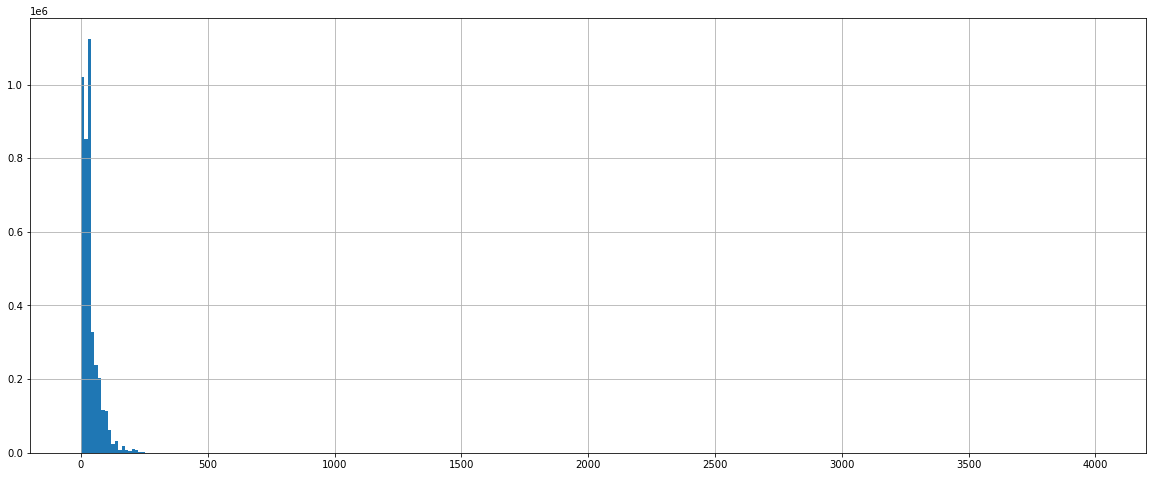

In [158]:
data3.Cijena.hist(bins=300, figsize=(20, 8))

<AxesSubplot:>

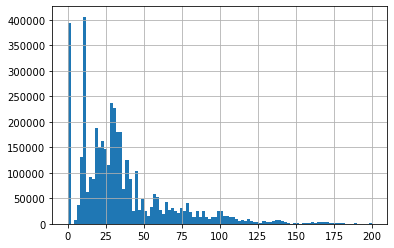

In [155]:
data3[data3["Cijena"] < 200].Cijena.hist(bins=100)

<AxesSubplot:>

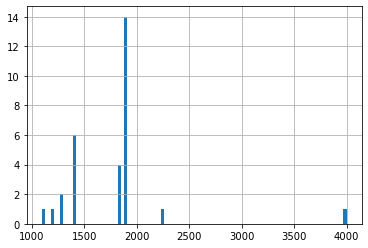

In [153]:
data3[data3["Cijena"] > 1000].Cijena.hist(bins=100)

In [159]:
data3['Income'] = data3['Cijena'] * data3['Prodaja']

In [162]:
data3.groupby('Naziv_novi')['Income'].sum().sort_values(0, ascending=False).head(20)

Naziv_novi
VINO GRAŠEVINA  1L KUTJEVO        5.881917e+06
VINO GRAŠEVINA 3L  BNB BELJE      4.154425e+06
VINO GRAŠEVINA  2L PET EZIMIT     3.502954e+06
VINO CHARDONNAY&R'KACITELI 2 L    3.162071e+06
VINO GRAŠEVINA 5L  PET EZIMIT     3.027752e+06
WHISKEY J.WALKER RED LAB 0,7L     2.975588e+06
VINO CHARDONNAY&R'KACITEL 3L      2.824898e+06
PELINKOVAC   0,1L  MARASKA        2.821641e+06
PELINKOVAC  1L MARASKA            2.584249e+06
WHISKEY  1L JACK DANIELS          2.440652e+06
VINO GRAŠEVINA 3L  PET EZIMIT     2.387201e+06
VINO MERLOT 3L  PET               2.309411e+06
VINO VRANAC  2L PET EZIMIT        2.139222e+06
VINO MALVAZIJA  1L ISTARSKA       2.127911e+06
VODKA  1L COSMOPOLITAN            2.032204e+06
VINO MERLOT  2L PET               2.028897e+06
JAGERMEISTER  0,7L                1.992994e+06
VINO MALVAZIJA 0,75L LAGUNA       1.962297e+06
VINO ZLATNA ŽLAHTINA  0,75L       1.941786e+06
JAGERMEISTER  1L                  1.862105e+06
Name: Income, dtype: float64

In [163]:
data3.groupby('Naziv_novi')['Prodaja'].sum().sort_values(0, ascending=False).head(20)

Naziv_novi
PELINKOVAC   0,1L  MARASKA           283863
VINO GRAŠEVINA  1L KUTJEVO           190256
VINO GRAŠEVINA  2L PET EZIMIT        162843
PRIMA BRAND 35%    0,1L   BADEL      136452
VINO CHARDONNAY&R'KACITELI 2 L       130984
VODKA   0,1L   MARASKA               118326
VINO VRANAC  2L PET EZIMIT           103200
VINO MERLOT  2L PET                   83584
VINO CHARDONNAY&R'KACITEL 3L          80493
ORAHOVAC   0,1L   MARASKA             76246
VINO GRAŠEVINA 3L  PET EZIMIT         72387
VINO CABERNET/SAUVIGNON 2L PET        72298
VINO GRAŠEVINA 3L  BNB BELJE          70453
PELINKOVAC GOR.  0,1L   BADEL1862     69025
VINO MALVAZIJA  1L ISTARSKA           68617
VINO GRAŠEVINA  1L ILOČKI PODR        66852
VINO MERLOT 3L  PET                   66746
VINO BIJELO STO.KORČULANSKO 1L        59416
ROOM   0,1L  MARASKA                  57910
VINO GRAŠEVINA  1L BELJE              55975
Name: Prodaja, dtype: int64

<AxesSubplot:xlabel='Naziv_novi'>

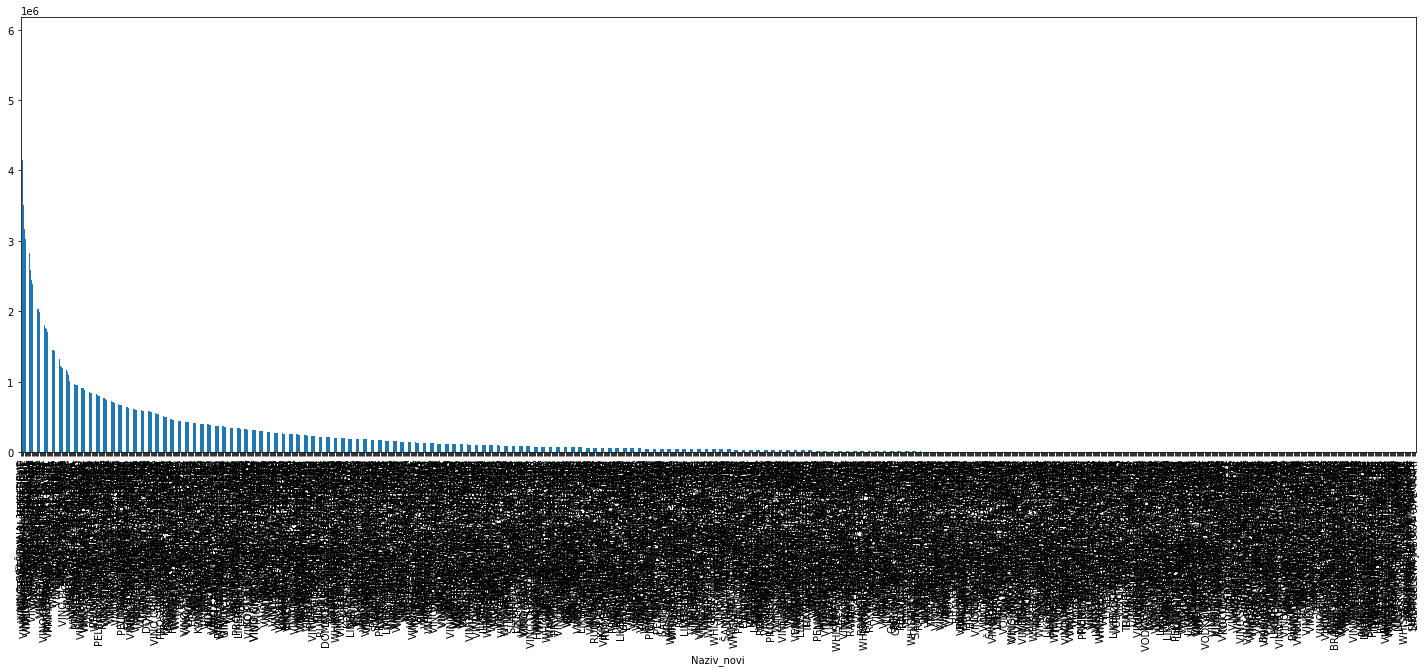

In [169]:
data3.groupby('Naziv_novi')['Income'].sum().sort_values(0, ascending=False).plot(kind='bar', figsize=(25, 8))

<AxesSubplot:xlabel='Naziv_novi'>

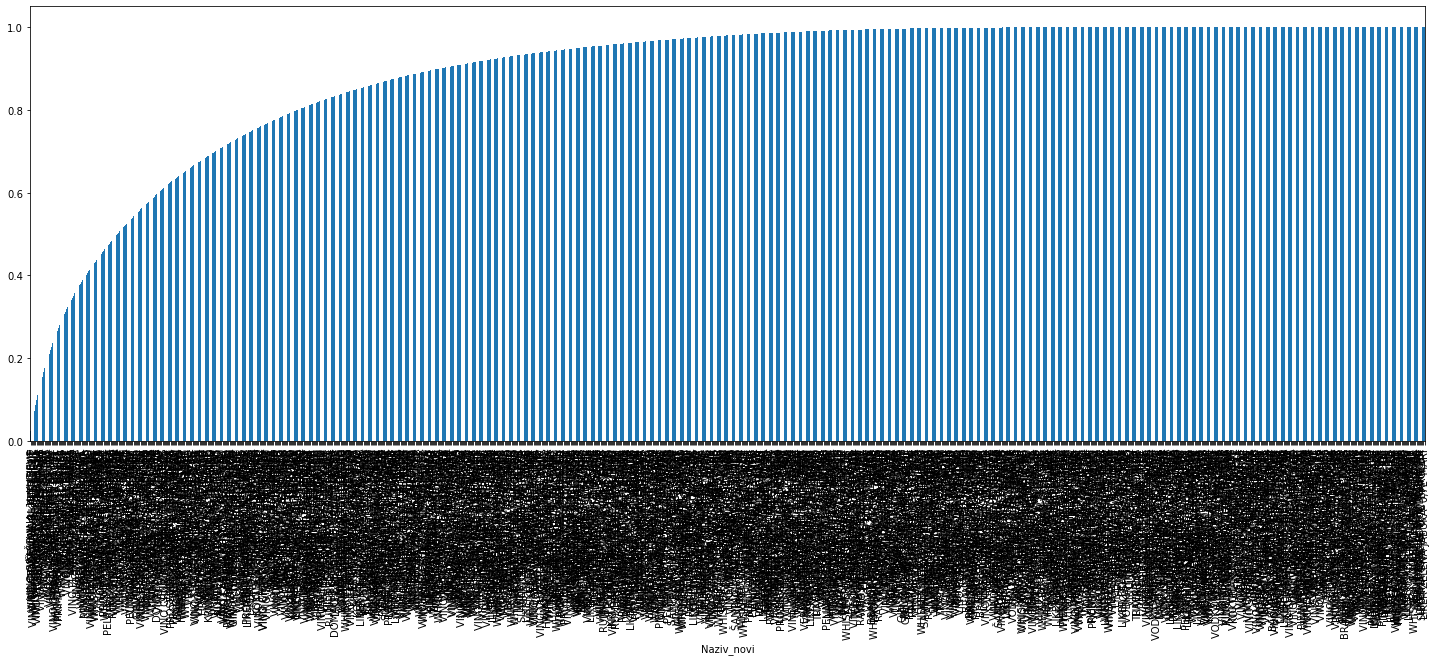

In [206]:
tmp1 = data3.groupby('Naziv_novi')['Income'].sum().sort_values(0, ascending=False).cumsum()
(tmp1 / data3.Income.sum()).plot(kind='bar', figsize=(25, 8))

## Prodaja

In [207]:
perc_cum_income = tmp1 / data3.Income.sum()
len(perc_cum_income[perc_cum_income < 0.75])

192

In [208]:
data3.Naziv_novi.nunique()

1207

In [194]:
10 / 1207

0.008285004142502071

In [238]:
# nađi prodaje artikala koje odskacu od standardne variacije za taj artikla unutar te poslovnice
art_pos_sales_summary = data3.groupby(["Naziv_novi", "Poslovnica"]).agg({"Prodaja":['std', 'mean']})

In [261]:
art_pos_sales_summary

Prodaja          
                                                 std      mean
Naziv_novi                      Poslovnica                    
AMARO   0,1L  DALMATA           10100       0.764854  1.263158
                                10109       0.688700  1.260870
                                10115       0.000000  1.000000
                                10140       0.667175  1.170732
                                10151       0.577350  1.333333
...                                              ...       ...
ŠLJIVOVICA ČUTUR.  0,7L  MARASK 10325       1.426588  1.446809
                                10327       1.083593  1.216216
                                10328       0.752773  0.833333
                                10329       0.639137  0.944444
                                10332            NaN  0.000000

[76800 rows x 2 columns]

In [245]:
data3['test'] = data3.apply(lambda x: x['Prodaja'] + 1, axis=1)

In [247]:
data3.drop('test', axis=1)

Datum  Poslovnica                                         Adresa  \
0       2018-12-17       10100                   Put Brodarice 6, 21000 Split   
1       2018-12-21       10100                   Put Brodarice 6, 21000 Split   
2       2018-12-24       10100                   Put Brodarice 6, 21000 Split   
3       2018-12-30       10100                   Put Brodarice 6, 21000 Split   
4       2019-01-08       10100                   Put Brodarice 6, 21000 Split   
...            ...         ...                                            ...   
4179445 2020-08-07       10317  Sveti Vid - Miholjice 205, 51511 Malinska/Krk   
4179446 2020-10-03       10317  Sveti Vid - Miholjice 205, 51511 Malinska/Krk   
4179447 2020-10-27       10317  Sveti Vid - Miholjice 205, 51511 Malinska/Krk   
4179448 2020-08-22       10321   Ulica Hrvatskih žrtava 44, 21218 Seget Donji   
4179449 2020-08-09       10325              Kralja Tomislava 100, 51523 Baška   

               Artikal  Cijena  Prodaja  Naruceno  Povrat  \
0                 3311   89.99        1         0       0   
1                 3311   89.99        2         0       0   
2                 3311   89.99        1         0       0   
3                 3311   89.99        1         0       0   
4                 3311   89.99        1         0       0   
...                ...     ...      ...       ...     ...   
4179445  3859893098246  109.99        1         0       0   
4179446  3859893098246  109.99        1         0       0   
4179447  3859893098246  109.99        1         0       0   
4179448  3859891486212  118.99        1         0       0   
4179449           5414   96.99        1         0       0   

                            Naziv_novi  
0        VINO PLAVAC 2718 0,75L DUBOKO  
1        VINO PLAVAC 2718 0,75L DUBOKO  
2        VINO PLAVAC 2718 0,75L DUBOKO  
3        VINO PLAVAC 2718 0,75L DUBOKO  
4        VINO PLAVAC 2718 0,75L DUBOKO  
...                                ...  
4179445          LIKER LEMONICA  0,7L   
4179446          LIKER LEMONICA  0,7L   
4179447          LIKER LEMONICA  0,7L   
4179448    VINO VUGAVA 0,75L LIPANOVIĆ  
4179449     VINO CHARDONNAY 0,75L FER.  

[4179446 rows x 9 columns]

In [264]:
art_pos_sales_summary[('AMARO 0,1L DALMATA',10100), :]

#, ('Prodaja','mean')

TypeError: '(('AMARO 0,1L DALMATA', 10100), slice(None, None, None))' is an invalid key

In [249]:
data3['Anomaly_score'] = data3.apply(lambda x: (x['Prodaja'] - art_pos_sales_summary[(x['Naziv_novi'], x['Poslovnica']), ('Prodaja','mean')]) / art_pos_sales_summary[(x['Naziv_novi'], x['Poslovnica']), ('Prodaja','std')], axis=1)

KeyError: (('VINO PLAVAC 2718 0,75L DUBOKO', 10100), ('Prodaja', 'mean'))

## Narudba

In [199]:
data3.sort_values('Naruceno', ascending=False).head(50)

Datum  Poslovnica                                         Adresa  \
1185933 2019-04-08       10225                      Put Dikla 60, 23000 Zadar   
3242215 2019-09-30       10160                 Vukovarska 36, 20000 Dubrovnik   
3025877 2019-11-04       10160                 Vukovarska 36, 20000 Dubrovnik   
3025894 2019-11-25       10160                 Vukovarska 36, 20000 Dubrovnik   
3242278 2020-01-08       10160                 Vukovarska 36, 20000 Dubrovnik   
4106942 2020-10-22       10128                      Dubrovačka 1, 21000 Split   
4107760 2020-09-09       10196      Trajektno pristanište 2, 21460 Stari Grad   
1742572 2020-06-04       10316                     Donji put 2a, 22242 Jezera   
1430320 2020-10-05       10270         Franje Tuđmana 1038, 21216 Kaštel Novi   
2446039 2020-10-28       10165                        Držićeva 1, 21000 Split   
2904949 2020-09-21       10180               Ante Starčevića 6, 20260 Korčula   
2985368 2019-07-03       10100                   Put Brodarice 6, 21000 Split   
3996462 2019-09-05       10318               Demetrija Hvarskog 4, 21450 Hvar   
909458  2020-02-20       10203   Franje Tuđmana 16, 23244 Starigrad Paklenica   
3984699 2019-07-04       10100                   Put Brodarice 6, 21000 Split   
2952050 2019-07-03       10100                   Put Brodarice 6, 21000 Split   
2961619 2019-07-03       10100                   Put Brodarice 6, 21000 Split   
3991837 2019-07-04       10100                   Put Brodarice 6, 21000 Split   
3029960 2018-11-28       10190                       Matoševa 29, 21210 Solin   
909225  2019-03-03       10203   Franje Tuđmana 16, 23244 Starigrad Paklenica   
909223  2019-03-01       10203   Franje Tuđmana 16, 23244 Starigrad Paklenica   
1586710 2019-05-27       10260                           Brajde 9c, 52465 Tar   
2354245 2019-07-09       10317  Sveti Vid - Miholjice 205, 51511 Malinska/Krk   
2354242 2019-07-06       10317  Sveti Vid - Miholjice 205, 51511 Malinska/Krk   
2354233 2019-06-27       10317  Sveti Vid - Miholjice 205, 51511 Malinska/Krk   
2354299 2019-10-16       10317  Sveti Vid - Miholjice 205, 51511 Malinska/Krk   
2354200 2019-06-03       10317  Sveti Vid - Miholjice 205, 51511 Malinska/Krk   
2354252 2019-07-16       10317  Sveti Vid - Miholjice 205, 51511 Malinska/Krk   
2354288 2019-08-21       10317  Sveti Vid - Miholjice 205, 51511 Malinska/Krk   
2354273 2019-08-06       10317  Sveti Vid - Miholjice 205, 51511 Malinska/Krk   
2355302 2019-08-06       10325              Kralja Tomislava 100, 51523 Baška   
2354190 2019-05-27       10317  Sveti Vid - Miholjice 205, 51511 Malinska/Krk   
1250288 2020-10-12       10247               Glavina Donja 491, 21260 Imotski   
1266088 2020-09-15       10284                  Runovići 406a, 21261 Runovići   
1237295 2020-09-21       10213  Cesta Dr. Franje Tuđmana 9, 21256 Cista Provo   
2967324 2019-07-03       10100                   Put Brodarice 6, 21000 Split   
3992963 2019-07-02       10165                        Držićeva 1, 21000 Split   
1237146 2020-02-24       10213  Cesta Dr. Franje Tuđmana 9, 21256 Cista Provo   
1666721 2020-07-23       10260                           Brajde 9c, 52465 Tar   
1666728 2020-08-03       10260                           Brajde 9c, 52465 Tar   
1586914 2020-05-25       10260                           Brajde 9c, 52465 Tar   
1658050 2019-06-17       10190                       Matoševa 29, 21210 Solin   
1657951 2019-01-15       10190                       Matoševa 29, 21210 Solin   
1554026 2019-08-19       10160                 Vukovarska 36, 20000 Dubrovnik   
1657934 2018-12-10       10190                       Matoševa 29, 21210 Solin   
2016189 2020-08-07       10160                 Vukovarska 36, 20000 Dubrovnik   
1451011 2019-08-31       10190                       Matoševa 29, 21210 Solin   
2122367 2020-03-16       10160                 Vukovarska 36, 20000 Dubrovnik   
3581628 2019-08-13       10290              